In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

%load_ext autoreload
%autoreload 2
from utils import show_heat_map, print_mutual_info, aggregate_data, resample_df, load_big_df
from utils import two_sig_signal, two_sig_signal_multi, get_yulu_df, nice_hist_series, plot_box_plot
from utils import plot_box_plot_a

from lin_regr_utils import lin_regr, linearity_test, residual_independence_test, homoscedasticity_test, residual_normality_test
from lin_regr_utils import multicollinearity_test, get_stats

In [2]:
df_raw = pd.read_csv("../simulation_data/output_2025-04-12_20250408_LOOKSUSDTOB500_LOOKSUSDTtrades_AA.csv")
df_raw

,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price
0,1.744070e+09,0.00917,0.00918,38783.8,35810.6,NaN,NaN,NaN
1,1.744070e+09,0.00917,0.00918,38783.8,13680.3,NaN,NaN,NaN
2,1.744070e+09,0.00917,0.00918,38783.8,12937.4,NaN,NaN,NaN
3,1.744070e+09,0.00917,0.00918,38783.8,11845.6,NaN,NaN,NaN
4,1.744070e+09,0.00917,0.00918,38783.8,11845.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
274524,1.744157e+09,0.00852,0.00854,12757.8,30719.6,NaN,NaN,NaN
274525,1.744157e+09,0.00852,0.00854,13344.7,31901.8,NaN,NaN,NaN
274526,1.744157e+09,0.00852,0.00854,12757.8,32487.3,NaN,NaN,NaN
274527,1.744157e+09,0.00852,0.00854,12757.8,32487.3,NaN,NaN,NaN


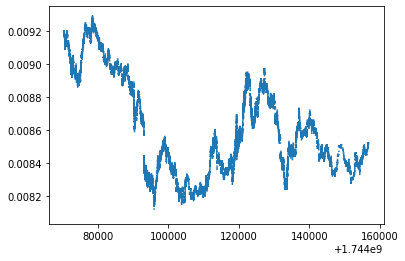

In [3]:
plt.plot(df_raw['time'], df_raw['bbid'])

In [47]:
df = pd.read_csv('../experiments/results/LOOKSUSDT_20250408_1.csv')
df['time'] = pd.to_datetime(df['time'], unit='s')
df

,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price,mid,past_3m_range,balance,tot_volume,position,exch_bids,exch_asks,exch_bids1,exch_asks1,pnl,pos_change
0,2025-04-08 00:00:01.428000000,0.00917,0.00918,38783.8,35810.6,NaN,NaN,NaN,0.009175,0.000000,0.000000,0.000000,0.000000,"(None, 0)","(None, 0)","(None, 0)","(None, 0)",0.000000,1
1,2025-04-08 00:00:01.527000064,0.00917,0.00918,38783.8,13680.3,NaN,NaN,NaN,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0
2,2025-04-08 00:00:01.625999872,0.00917,0.00918,38783.8,12937.4,NaN,NaN,NaN,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0
3,2025-04-08 00:00:01.727000064,0.00917,0.00918,38783.8,11845.6,NaN,NaN,NaN,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0
4,2025-04-08 00:00:02.027000064,0.00917,0.00918,38783.8,11845.6,NaN,NaN,NaN,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274524,2025-04-09 00:00:00.892999936,0.00852,0.00854,12757.8,30719.6,NaN,NaN,NaN,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0
274525,2025-04-09 00:00:01.092999936,0.00852,0.00854,13344.7,31901.8,NaN,NaN,NaN,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0
274526,2025-04-09 00:00:01.193000192,0.00852,0.00854,12757.8,32487.3,NaN,NaN,NaN,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0
274527,2025-04-09 00:00:01.292999936,0.00852,0.00854,12757.8,32487.3,NaN,NaN,NaN,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0


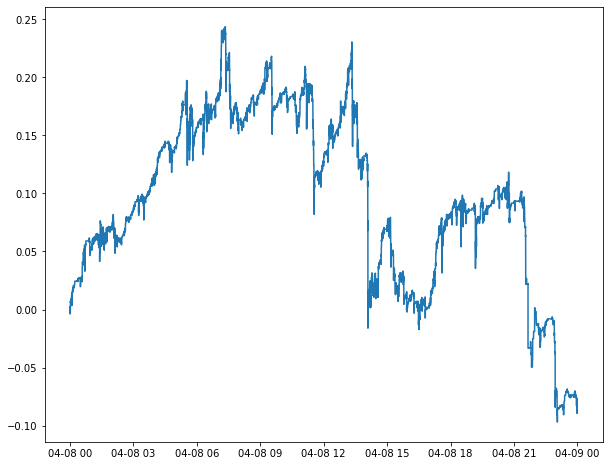

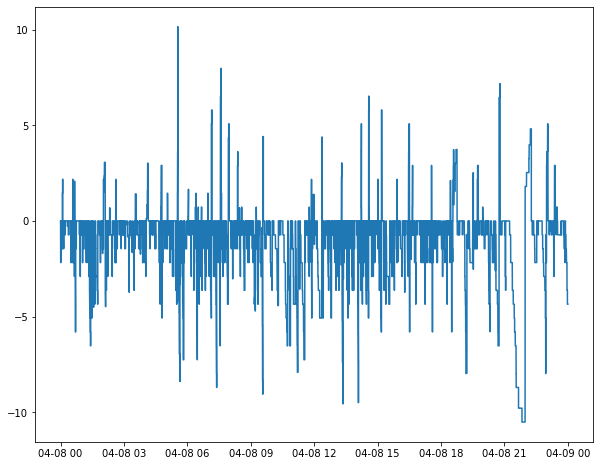

In [49]:
# pdf = df
# N = len(df)
# pdf = df
# # pdf = df.iloc[int(N * 0.22): int(N * 0.27)]
# pdf = df.set_index('time')
# pdf = df.loc[pd.DateTime(): int(N * 0.27)]

begin_time = '2025-04-08 06:18:09.400'
end_time = '2025-04-08 06:18:09.800'
pdf = df[(df['time'] >= begin_time) & (df['time'] <= end_time)]
pdf = df

plt.figure(figsize=(10, 8))
plt.plot(pdf['time'], pdf['pnl'])
plt.show()
plt.figure(figsize=(10, 8))
plt.plot(pdf['time'], pdf['position']  * df_raw['bbid'].mean())
plt.show()

In [46]:
pdf.columns
pdf[['time', 'bbid', 'bask', 'trade_side', 'trade_size',
       'trade_price', 'past_3m_range', 
       'position', 'exch_bids', 'exch_asks', 'exch_bids1', 'exch_asks1', 'pnl',
       'pos_change']]

,time,bbid,bask,trade_side,trade_size,trade_price,past_3m_range,position,exch_bids,exch_asks,exch_bids1,exch_asks1,pnl,pos_change
75447,2025-04-08 06:18:09.404599808,0.00821,0.00825,Sell,15039.3,0.00822,0.000425,1180.438449,"(0.00827, 0)","(0.0083, 0)","(0.00827, 0.0)","(0.0083, 843.1703204047217)",0.181991,0
75448,2025-04-08 06:18:09.405999872,0.00821,0.00825,Sell,4.3,0.00821,0.000425,1180.438449,"(0.00827, 0)","(0.0083, 0)","(0.00827, 0.0)","(0.0083, 843.1703204047217)",0.181991,0
75449,2025-04-08 06:18:09.411099904,0.00821,0.00825,Sell,16388.0,0.00821,0.000425,1180.438449,"(0.00827, 0)","(0.0083, 0)","(0.00827, 0.0)","(0.0083, 843.1703204047217)",0.181991,0
75450,2025-04-08 06:18:09.415000064,0.00821,0.00825,Sell,1652.4,0.00822,0.000425,1264.755481,"(0.00827, 0)","(0.0083, 0)","(0.00827, 0.0)","(0.0083, 843.1703204047217)",0.178618,0
75451,2025-04-08 06:18:09.415000064,0.00821,0.00825,Sell,7716.9,0.00821,0.000425,1264.755481,"(0.00827, 0)","(0.0083, 0)","(0.00827, 0.0)","(0.0083, 843.1703204047217)",0.178618,0
75452,2025-04-08 06:18:09.421099776,0.00821,0.00825,Buy,4206.2,0.00823,0.000425,1264.755481,"(0.00827, 0)","(0.0083, 0)","(0.00827, 84.31703204047217)","(0.0083, 843.1703204047217)",0.178618,0
75453,2025-04-08 06:18:09.436000000,0.00821,0.00825,Buy,12182.7,0.00823,0.000425,1264.755481,"(0.00827, 0)","(0.0083, 0)","(0.00827, 84.31703204047217)","(0.0083, 843.1703204047217)",0.178618,0
75454,2025-04-08 06:18:09.436199936,0.00821,0.00825,Sell,16724.8,0.00822,0.000425,1349.072513,"(0.00827, 0)","(0.0083, 0)","(0.00827, 0.0)","(0.0083, 843.1703204047217)",0.175245,0
75455,2025-04-08 06:18:09.450400000,0.00821,0.00825,Sell,6170.0,0.00821,0.000425,1433.389545,"(0.00827, 0)","(0.0083, 0)","(0.00827, 0.0)","(0.0083, 843.1703204047217)",0.171873,0
75456,2025-04-08 06:18:09.455100160,0.00821,0.00825,Sell,32421.4,0.00821,0.000425,1517.706577,"(0.00827, 0)","(0.0083, 0)","(0.00827, 0.0)","(0.0083, 843.1703204047217)",0.168500,0


In [58]:
# df
df_buy, df_sell, df_ob = aggregate_data(df)
# df_ob
# df_sell
# df_sell

df_buy = df_buy.rename(columns={x:'buy_'+ x for x in df_buy.columns})
df_sell = df_sell.rename(columns={x:'sell_'+ x for x in df_sell.columns})
print(df_ob.columns)
print(df_sell.columns)
print(df_buy.columns)

dff = df_ob.join(df_buy.join(df_sell, how='outer'), how='outer')
dff

Index(['bbid', 'bask', 'bsize', 'asize', 'mid', 'past_3m_range', 'balance',
       'tot_volume', 'position', 'exch_bids', 'exch_asks', 'exch_bids1',
       'exch_asks1', 'pnl', 'pos_change'],
      dtype='object')
Index(['sell_trade_size_sum', 'sell_trade_price_min', 'sell_trade_price_max'], dtype='object')
Index(['buy_trade_size_sum', 'buy_trade_price_min', 'buy_trade_price_max'], dtype='object')


,bbid,bask,bsize,asize,mid,past_3m_range,balance,tot_volume,position,exch_bids,exch_asks,exch_bids1,exch_asks1,pnl,pos_change,buy_trade_size_sum,buy_trade_price_min,buy_trade_price_max,sell_trade_size_sum,sell_trade_price_min,sell_trade_price_max
time,,,,,,,,,,,,,,,,,,,,,
2025-04-08 00:00:01.428000000,0.00917,0.00918,38783.8,35810.6,0.009175,0.000000,0.000000,0.000000,0.000000,"(None, 0)","(None, 0)","(None, 0)","(None, 0)",0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-08 00:00:01.527000064,0.00917,0.00918,38783.8,13680.3,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-08 00:00:01.625999872,0.00917,0.00918,38783.8,12937.4,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-08 00:00:01.727000064,0.00917,0.00918,38783.8,11845.6,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-08 00:00:02.027000064,0.00917,0.00918,38783.8,11845.6,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-09 00:00:00.892999936,0.00852,0.00854,12757.8,30719.6,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-09 00:00:01.092999936,0.00852,0.00854,13344.7,31901.8,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-09 00:00:01.193000192,0.00852,0.00854,12757.8,32487.3,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0.0,NaN,NaN,NaN,NaN,NaN,NaN


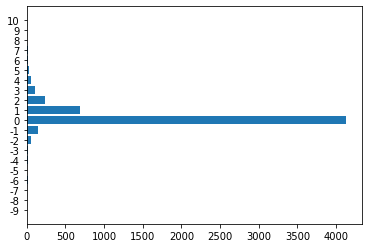

10 2 2 20.3
9 2 4 36.6
8 6 10 81.5
7 11 21 150.15
6 18 39 239.85000000000002
5 29 68 350.20000000000005
4 56 124 514.6
3 101 225 708.75
2 230 455 978.25
1 691 1146 1317.8999999999999
0 4125 5271 790.65


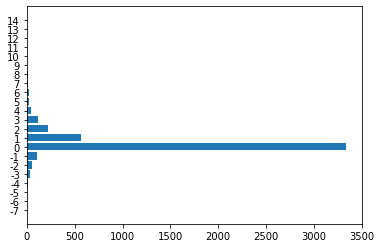

14 2 2 28.3
13 1 3 39.45
12 4 7 85.05
11 3 10 111.5
10 2 12 121.80000000000001
9 4 16 146.4
8 9 25 203.75
7 9 34 243.10000000000002
6 17 51 313.65000000000003
5 20 71 365.65000000000003
4 47 118 489.70000000000005
3 114 232 730.8
2 221 453 973.9499999999999
1 560 1013 1164.9499999999998
0 3334 4347 652.05
1146 1013 2159


In [96]:

dff['bbid'] = dff['bbid'].ffill()
dff['bask'] = dff['bask'].ffill()
dff[:100]

bdf = dff.dropna(subset=['buy_trade_size_sum'])

bd = dict((bdf['buy_trade_price_max'] - bdf['bask']).value_counts())
nbd = {}
for k,v in bd.items():
    kk = round(k*100000)
    if not kk in nbd:
        nbd[kk] = v
    else:
        nbd[kk] += v

snbd = dict(sorted(list(nbd.items())))

keys = [str(x) for x in list(snbd.keys())]
values = list(snbd.values())
plt.barh(keys, values)
plt.show()

sumv = 0
for k, v in list(snbd.items())[::-1]:
    if k>=0:
        sumv += v
        print(k, v, sumv, (k+0.15)*sumv)

bsum = sum([v for k, v in snbd.items() if k>=1])

bd = dict((sdf['bbid'] - sdf['sell_trade_price_min']).value_counts())
nbd = {}
for k,v in bd.items():
    kk = round(k*100000)
    if not kk in nbd:
        nbd[kk] = v
    else:
        nbd[kk] += v

snbd = dict(sorted(list(nbd.items())))

keys = [str(x) for x in list(snbd.keys())]
values = list(snbd.values())
plt.barh(keys, values)
plt.show()
# print(snbd.items())

sumv = 0
for k, v in list(snbd.items())[::-1]:
    if k>=0:
        sumv += v
        print(k, v, sumv, (k+0.15)*sumv)

ssum = sum([v for k, v in snbd.items() if k>=1])

print(bsum, ssum, bsum + ssum)
# print(dict((bdf['buy_trade_price_max'] - bdf['bask']).value_counts()))
# plt.hist(bdf['buy_trade_price_max'] - bdf['bask'], bins=30)
# plt.xticks(rotation=45)
# plt.show()

# sdf = dff.dropna(subset=['sell_trade_size_sum'])
# plt.hist(sdf['bbid'] - sdf['sell_trade_size_sum'], bins=30)
# plt.xticks(rotation=45)
# plt.show()

In [81]:
df['pos_change'].sum()

878

In [98]:
df

,time,bbid,bask,bsize,asize,trade_side,trade_size,trade_price,mid,past_3m_range,balance,tot_volume,position,exch_bids,exch_asks,exch_bids1,exch_asks1,pnl,pos_change
0,2025-04-08 00:00:01.428000000,0.00917,0.00918,38783.8,35810.6,NaN,NaN,NaN,0.009175,0.000000,0.000000,0.000000,0.000000,"(None, 0)","(None, 0)","(None, 0)","(None, 0)",0.000000,1
1,2025-04-08 00:00:01.527000064,0.00917,0.00918,38783.8,13680.3,NaN,NaN,NaN,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0
2,2025-04-08 00:00:01.625999872,0.00917,0.00918,38783.8,12937.4,NaN,NaN,NaN,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0
3,2025-04-08 00:00:01.727000064,0.00917,0.00918,38783.8,11845.6,NaN,NaN,NaN,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0
4,2025-04-08 00:00:02.027000064,0.00917,0.00918,38783.8,11845.6,NaN,NaN,NaN,0.009175,0.000000,0.000000,0.000000,0.000000,"(0.00916, 0)","(0.00919, 0)","(0.00916, 0)","(0.00919, 84.31703204047217)",0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274524,2025-04-09 00:00:00.892999936,0.00852,0.00854,12757.8,30719.6,NaN,NaN,NaN,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0
274525,2025-04-09 00:00:01.092999936,0.00852,0.00854,13344.7,31901.8,NaN,NaN,NaN,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0
274526,2025-04-09 00:00:01.193000192,0.00852,0.00854,12757.8,32487.3,NaN,NaN,NaN,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0
274527,2025-04-09 00:00:01.292999936,0.00852,0.00854,12757.8,32487.3,NaN,NaN,NaN,0.008530,0.000035,4.226254,2020.440569,-505.902192,"(0.00852, 0)","(0.00855, 0)","(0.00851, 505.902192242833)","(0.00855, 84.31703204047217)",-0.089091,0
